# Loan

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelBinarizer

In [2]:

df = pd.read_csv("loan_dataset.csv")
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:

df.shape


(4269, 13)

In [4]:

df.columns


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
df.columns = [col.strip() for col in df.columns]


In [6]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:

df.describe()


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [8]:

df.isnull().sum()


,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [9]:

df.duplicated().sum()


np.int64(0)

In [10]:
X=df.drop(columns=['loan_amount'])
y=df['loan_amount']

In [11]:
X=df.drop(columns=['loan_id'])

In [12]:
nums_cols=X.select_dtypes(include=['int64','float64']).columns.tolist()
print("The number columns are: ",nums_cols)
binary_cols=[col for col in X.columns if X[col].nunique()==2]
print("The binary columns are: ",binary_cols)
cat_cols=X.select_dtypes(include='object').columns.tolist()
cat_cols=[col for col in cat_cols if col not in binary_cols]
print("The categorical columns are: ",cat_cols)

The number columns are:  ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
The binary columns are:  ['education', 'self_employed', 'loan_status']
The categorical columns are:  []


In [13]:
df = df[df['residential_assets_value'] >= 0]


In [14]:
money_cols = [
    'income_annum',
    'loan_amount',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]

for col in money_cols:
    df[col] = np.log1p(df[col])


In [15]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


In [16]:
print(X)

      no_of_dependents      education self_employed  income_annum  \
0                    2       Graduate            No       9600000   
1                    0   Not Graduate           Yes       4100000   
2                    3       Graduate            No       9100000   
3                    3       Graduate            No       8200000   
4                    5   Not Graduate           Yes       9800000   
...                ...            ...           ...           ...   
4264                 5       Graduate           Yes       1000000   
4265                 0   Not Graduate           Yes       3300000   
4266                 2   Not Graduate            No       6500000   
4267                 1   Not Graduate            No       4100000   
4268                 1       Graduate            No       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12          778                   2400000   
1        12200000          8 

In [17]:
scaler = StandardScaler()
X[nums_cols] = scaler.fit_transform(X[nums_cols])

In [18]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [19]:
print(X)

      no_of_dependents      education self_employed  income_annum  \
0            -0.294102       Graduate            No      1.617979   
1            -1.473548   Not Graduate           Yes     -0.341750   
2             0.295621       Graduate            No      1.439822   
3             0.295621       Graduate            No      1.119139   
4             1.475067   Not Graduate           Yes      1.689242   
...                ...            ...           ...           ...   
4264          1.475067       Graduate           Yes     -1.446324   
4265         -1.473548   Not Graduate           Yes     -0.626801   
4266         -0.294102   Not Graduate            No      0.513405   
4267         -0.883825   Not Graduate            No     -0.341750   
4268         -0.883825       Graduate            No      1.475453   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        1.633052   0.192617     1.032792                 -0.780058   
1       -0.324414  -0.508091 

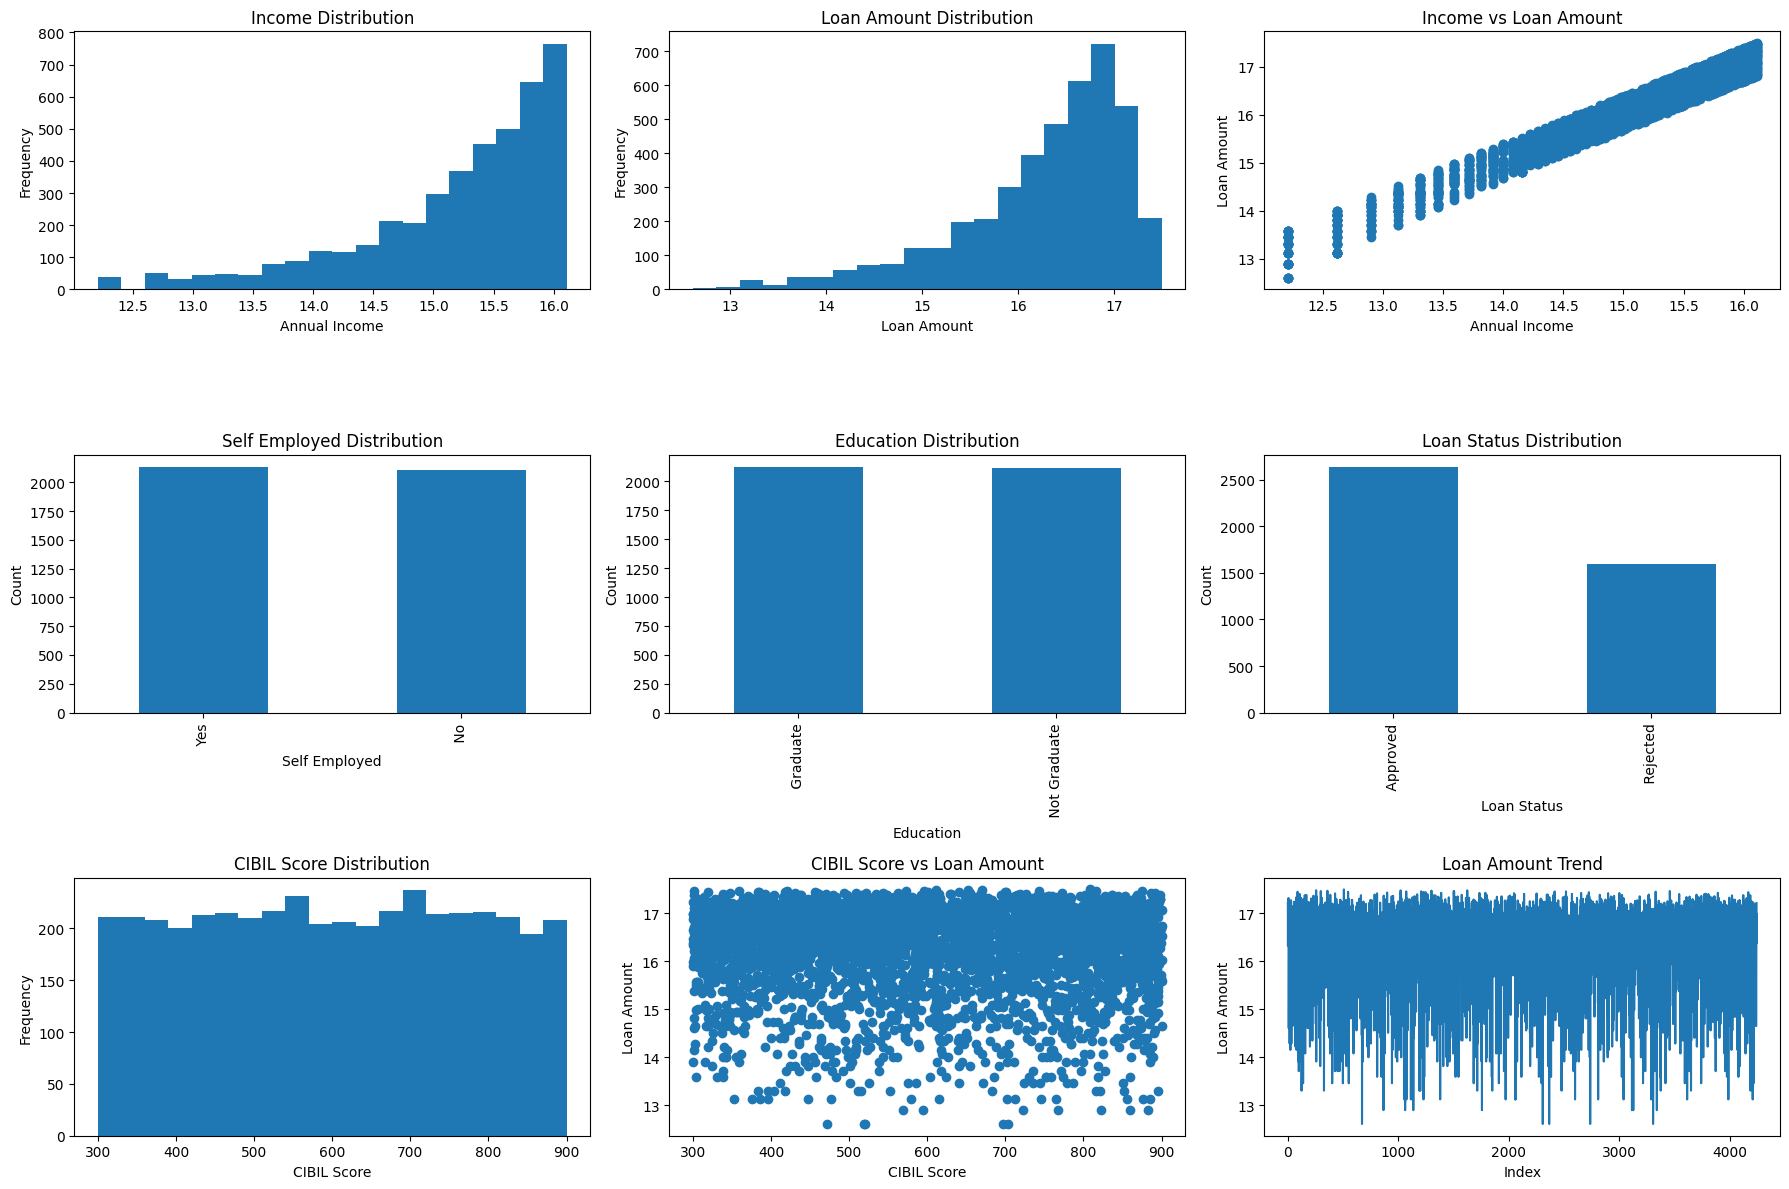

In [20]:
plt.figure(figsize=(18, 12))

# 1️⃣ Income Distribution (Histogram)
plt.subplot(3, 3, 1)
plt.hist(df['income_annum'], bins=20)
plt.title("Income Distribution")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")

# 2️⃣ Loan Amount Distribution (Histogram)
plt.subplot(3, 3, 2)
plt.hist(df['loan_amount'], bins=20)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")

# 3️⃣ Income vs Loan Amount (Scatter Plot)
plt.subplot(3, 3, 3)
plt.scatter(df['income_annum'], df['loan_amount'])
plt.title("Income vs Loan Amount")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")

# 4️⃣ Self Employed Distribution (Bar Chart)
plt.subplot(3, 3, 4)
df['self_employed'].value_counts().plot(kind='bar')
plt.title("Self Employed Distribution")
plt.xlabel("Self Employed")
plt.ylabel("Count")

# 5️⃣ Education Distribution (Bar Chart)
plt.subplot(3, 3, 5)
df['education'].value_counts().plot(kind='bar')
plt.title("Education Distribution")
plt.xlabel("Education")
plt.ylabel("Count")

# 6️⃣ Loan Status Distribution (Bar Chart)
plt.subplot(3, 3, 6)
df['loan_status'].value_counts().plot(kind='bar')
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")

# 7️⃣ CIBIL Score Distribution (Histogram)
plt.subplot(3, 3, 7)
plt.hist(df['cibil_score'], bins=20)
plt.title("CIBIL Score Distribution")
plt.xlabel("CIBIL Score")
plt.ylabel("Frequency")

# 8️⃣ CIBIL Score vs Loan Amount (Scatter Plot)
plt.subplot(3, 3, 8)
plt.scatter(df['cibil_score'], df['loan_amount'])
plt.title("CIBIL Score vs Loan Amount")
plt.xlabel("CIBIL Score")
plt.ylabel("Loan Amount")

# 9️⃣ Loan Amount Trend (Line Plot)
plt.subplot(3, 3, 9)
plt.plot(df['loan_amount'].values)
plt.title("Loan Amount Trend")
plt.xlabel("Index")
plt.ylabel("Loan Amount")

plt.tight_layout()
plt.show()


In [21]:

X = df.drop(columns=['loan_id', 'loan_amount'])
y = df['loan_amount']


In [22]:
cat_cols = X.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", cat_cols)


Categorical columns: ['education', 'self_employed', 'loan_status']


In [23]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


In [24]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=8)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['income_annum', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'education_ Not Graduate'],
      dtype='object')


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (3392, 8)
Testing set shape: (849, 8)


# Hand Written

In [26]:
!ls -lh

total 47M
-rw-r--r-- 1 root root 3.7M Jan 27 17:55 diabetes_prediction_dataset.csv
-rw-r--r-- 1 root root  30M Jan 27 17:55 email_classification.csv
-rw-r--r-- 1 root root  14M Jan 27 17:55 Handwritten_dataset.zip
drwxr-xr-x 2 root root 124K Jan 27 17:59 Img
-rw-r--r-- 1 root root 5.0K Jan 27 17:55 Iris.csv
-rw-r--r-- 1 root root 376K Jan 27 17:55 loan_dataset.csv
drwxr-xr-x 1 root root 4.0K Jan 16 14:24 sample_data


In [27]:
!file Handwritten_dataset.zip


Handwritten_dataset.zip: Zip archive data, at least v4.5 to extract, compression method=deflate


In [28]:
!unzip -q Handwritten_dataset.zip


replace Img/img001-001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [29]:
!ls

diabetes_prediction_dataset.csv  Handwritten_dataset.zip  loan_dataset.csv
email_classification.csv	 Img			  sample_data
english.csv			 Iris.csv


In [30]:
import pandas as pd

df = pd.read_csv("english.csv")
df.head()


,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [31]:
import os
import cv2
import numpy as np

X = []
y = []

base_path = "Img"
missing = 0

for _, row in df.iterrows():
    img_path = os.path.join(base_path, row['image'].split('/')[-1])
    label = row['label']

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        missing += 1
        continue

    img = cv2.resize(img, (28, 28))
    img = img / 255.0

    X.append(img.flatten())
    y.append(label)

X = np.array(X)
y = np.array(y)

print("Loaded images:", X.shape[0])
print("Missing images:", missing)
print("Feature shape:", X.shape)
print("Labels shape:", y.shape)


Loaded images: 3410
Missing images: 0
Feature shape: (3410, 784)
Labels shape: (3410,)


In [32]:
print(X)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [33]:
print(X.shape)
print(y.shape)
print(np.unique(y))


(3410, 784)
(3410,)
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)


In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
X_decomposed = pca.fit_transform(X_scaled)


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(y_encoded)


[ 0  0  0 ... 61 61 61]


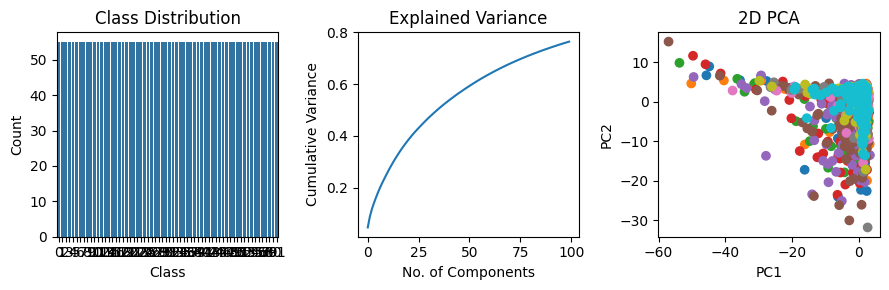

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

fig, axes = plt.subplots(1, 3, figsize=(9, 3))  # total width 9, each ~3

# 1️⃣ Class Distribution
sns.countplot(x=y_encoded, ax=axes[0])
axes[0].set_title("Class Distribution")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

# 2️⃣ Cumulative Explained Variance
axes[1].plot(np.cumsum(pca.explained_variance_ratio_))
axes[1].set_title("Explained Variance")
axes[1].set_xlabel("No. of Components")
axes[1].set_ylabel("Cumulative Variance")

# 3️⃣ 2D PCA Visualization
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

scatter = axes[2].scatter(X_2d[:, 0], X_2d[:, 1],
                           c=y_encoded, cmap='tab10')
axes[2].set_title("2D PCA")
axes[2].set_xlabel("PC1")
axes[2].set_ylabel("PC2")

plt.tight_layout()
plt.show()


In [38]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=50)
X_selected = selector.fit_transform(X_decomposed, y_encoded)

print("Selected feature shape:", X_selected.shape)


Selected feature shape: (3410, 50)


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(X_train.shape, X_test.shape)


(2728, 50) (682, 50)


# Email

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
df = pd.read_csv("email_classification.csv")

In [41]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [42]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [43]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [44]:
df.shape

(5172, 3002)

In [45]:
df.drop(columns=["Email No."], inplace=True)

In [46]:
X = df.drop(columns=["Prediction"])
y = df["Prediction"]

In [47]:
# Numeric columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("The number columns are: ",num_cols)
# Binary columns (rare here, but included for completeness)
binary_cols = [col for col in X.columns if X[col].nunique() == 2]
print("The binary columns are: ",binary_cols)
# Categorical columns (usually none in BoW)
cat_cols = X.select_dtypes(include="object").columns.tolist()
cat_cols = [col for col in cat_cols if col not in binary_cols]
print("The categorical columns are: ",cat_cols)


The number columns are:  ['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in', 'on', 'is', 'this', 'enron', 'i', 'be', 'that', 'will', 'have', 'with', 'your', 'at', 'we', 's', 'are', 'it', 'by', 'com', 'as', 'from', 'gas', 'or', 'not', 'me', 'deal', 'if', 'meter', 'hpl', 'please', 're', 'e', 'any', 'our', 'corp', 'can', 'd', 'all', 'has', 'was', 'know', 'need', 'an', 'forwarded', 'new', 't', 'may', 'up', 'j', 'mmbtu', 'should', 'do', 'am', 'get', 'out', 'see', 'no', 'there', 'price', 'daren', 'but', 'been', 'company', 'l', 'these', 'let', 'so', 'would', 'm', 'into', 'xls', 'farmer', 'attached', 'us', 'information', 'they', 'message', 'day', 'time', 'my', 'one', 'what', 'only', 'http', 'th', 'volume', 'mail', 'contract', 'which', 'month', 'more', 'robert', 'sitara', 'about', 'texas', 'nom', 'energy', 'pec', 'questions', 'www', 'deals', 'volumes', 'pm', 'ena', 'now', 'their', 'file', 'some', 'email', 'just', 'also', 'call', 'change', 'other', 'here', 'like', 'b', 'flow', 'net

In [48]:
for col in X.columns:
    print(col,X[col].isnull().sum())

the 0
to 0
ect 0
and 0
for 0
of 0
a 0
you 0
hou 0
in 0
on 0
is 0
this 0
enron 0
i 0
be 0
that 0
will 0
have 0
with 0
your 0
at 0
we 0
s 0
are 0
it 0
by 0
com 0
as 0
from 0
gas 0
or 0
not 0
me 0
deal 0
if 0
meter 0
hpl 0
please 0
re 0
e 0
any 0
our 0
corp 0
can 0
d 0
all 0
has 0
was 0
know 0
need 0
an 0
forwarded 0
new 0
t 0
may 0
up 0
j 0
mmbtu 0
should 0
do 0
am 0
get 0
out 0
see 0
no 0
there 0
price 0
daren 0
but 0
been 0
company 0
l 0
these 0
let 0
so 0
would 0
m 0
into 0
xls 0
farmer 0
attached 0
us 0
information 0
they 0
message 0
day 0
time 0
my 0
one 0
what 0
only 0
http 0
th 0
volume 0
mail 0
contract 0
which 0
month 0
more 0
robert 0
sitara 0
about 0
texas 0
nom 0
energy 0
pec 0
questions 0
www 0
deals 0
volumes 0
pm 0
ena 0
now 0
their 0
file 0
some 0
email 0
just 0
also 0
call 0
change 0
other 0
here 0
like 0
b 0
flow 0
net 0
following 0
p 0
production 0
when 0
over 0
back 0
want 0
original 0
them 0
below 0
o 0
ticket 0
c 0
he 0
could 0
make 0
inc 0
report 0
march 0
contact 

In [49]:
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
X = imp.fit_transform(X)

In [50]:
for col in num_cols: # example column
    df[col] = np.log1p(df[col])

In [51]:
for col in num_cols:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()
    std = df[col].std()
    qk = df[col].quantile(0.75)
    print(col,mean,median,mode,std,qk)

Streaming output truncated to the last 5000 lines.
fuels 0.020389538859418087 0.0 0    0.0
Name: fuels, dtype: float64 0.13997318763657846 0.0
getting 0.023759484157514003 0.0 0    0.0
Name: getting, dtype: float64 0.13449182562549095 0.0
advice 0.016515993832734704 0.0 0    0.0
Name: advice, dtype: float64 0.14762453371652678 0.0
why 0.025248619622488967 0.0 0    0.0
Name: why, dtype: float64 0.1444286545474938 0.0
increase 0.0331099979619155 0.0 0    0.0
Name: increase, dtype: float64 0.1695099860217808 0.0
path 0.0356489168671682 0.0 0    0.0
Name: path, dtype: float64 0.2143116778881631 0.0
sell 0.04779035818868961 0.0 0    0.0
Name: sell, dtype: float64 0.20385091033841862 0.0
works 0.03512255515223897 0.0 0    0.0
Name: works, dtype: float64 0.1840373650069639 0.0
issues 0.022161766999969388 0.0 0    0.0
Name: issues, dtype: float64 0.14631722265122094 0.0
three 0.02201200625518102 0.0 0    0.0
Name: three, dtype: float64 0.13849695676739235 0.0
enronxgate 0.016502300338842802 0.

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer

mask = ~np.isnan(y)
y = y[mask]

lb = LabelBinarizer(neg_label=0, pos_label=1)
y_bin = lb.fit_transform(y)


In [54]:
print(X_scaled,y_bin)

[[-0.56544926 -0.64908256 -0.2938948  ... -0.0562853  -0.32904848
  -0.07097072]
 [ 0.11575699  0.71450797  1.33733653 ... -0.0562853   0.03067224
  -0.07097072]
 [-0.56544926 -0.64908256 -0.2938948  ... -0.0562853  -0.32904848
  -0.07097072]
 ...
 [-0.56544926 -0.64908256 -0.2938948  ... -0.0562853  -0.32904848
  -0.07097072]
 [-0.3951477   0.0851585  -0.2938948  ... -0.0562853   0.03067224
  -0.07097072]
 [ 1.30786793  1.86831533 -0.0102024  ... -0.0562853  -0.32904848
  -0.07097072]] [[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]


In [55]:
counts = df['Prediction'].value_counts()
percent = df['Prediction'].value_counts(normalize=True) * 100

print(counts)
print(percent)

Prediction
0    3672
1    1500
Name: count, dtype: int64
Prediction
0    70.99768
1    29.00232
Name: proportion, dtype: float64


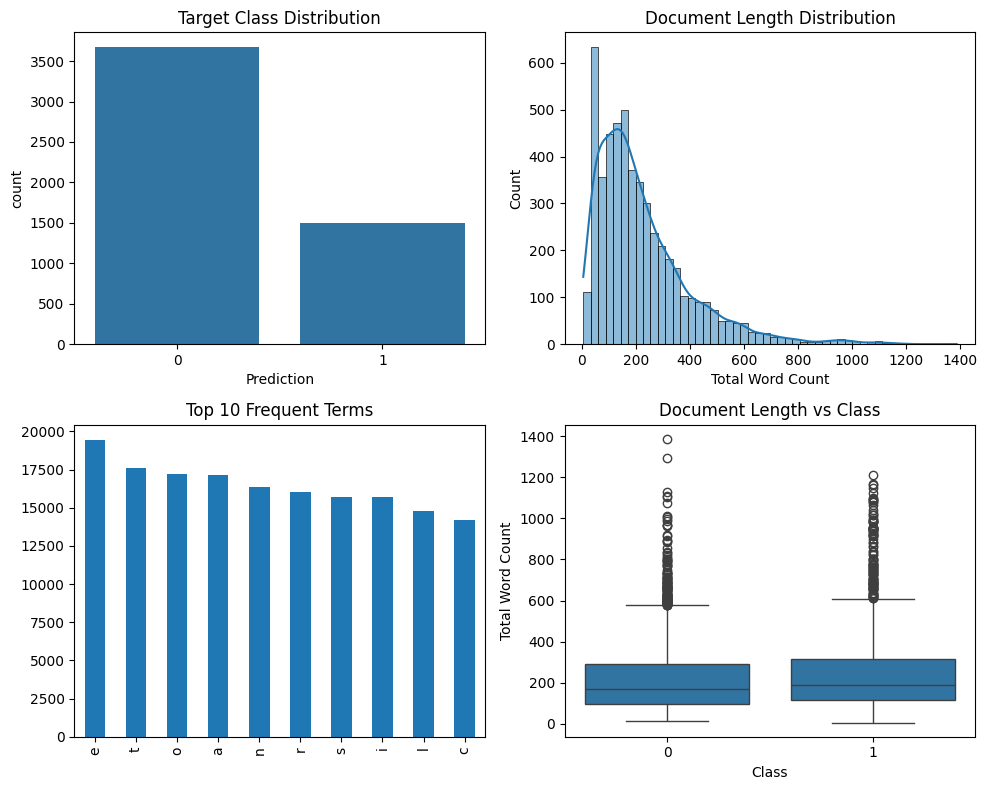

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 1️⃣ Target Class Distribution
sns.countplot(x=df['Prediction'], ax=axes[0, 0])
axes[0, 0].set_title("Target Class Distribution")

# 2️⃣ Document Length Distribution
doc_length = df.drop(columns=['Prediction']).sum(axis=1)
sns.histplot(doc_length, bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Document Length Distribution")
axes[0, 1].set_xlabel("Total Word Count")

# 3️⃣ Top Frequent Terms
word_freq = df.drop(columns=['Prediction']).sum().sort_values(ascending=False)
word_freq.head(10).plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title("Top 10 Frequent Terms")

# 4️⃣ Document Length vs Class
sns.boxplot(x=df['Prediction'], y=doc_length, ax=axes[1, 1])
axes[1, 1].set_title("Document Length vs Class")
axes[1, 1].set_xlabel("Class")
axes[1, 1].set_ylabel("Total Word Count")

plt.tight_layout()
plt.show()


In [57]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=500)
X_selected = selector.fit_transform(X_scaled, y_bin.ravel())

print("Selected features shape:", X_selected.shape)

Selected features shape: (5172, 500)


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_bin, test_size=0.2, random_state=42, stratify=y_bin
)

print(X_train.shape, X_test.shape)

(4137, 500) (1035, 500)


# Diabetes

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelBinarizer

In [60]:
df=pd.read_csv("diabetes_prediction_dataset.csv")

In [61]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [63]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [64]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [65]:
df.shape

(100000, 9)

In [66]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [67]:
X=df.drop(columns=['diabetes'])
y=df['diabetes']

In [68]:
nums_cols=X.select_dtypes(include=['int64','float64']).columns.tolist()
print("The number columns are: ",nums_cols)
binary_cols=[col for col in X.columns if X[col].nunique()==2]
print("The binary columns are: ",binary_cols)
cat_cols=X.select_dtypes(include='object').columns.tolist()
cat_cols=[col for col in cat_cols if col not in binary_cols]
print("The categorical columns are: ",cat_cols)

The number columns are:  ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
The binary columns are:  ['hypertension', 'heart_disease']
The categorical columns are:  ['gender', 'smoking_history']


In [69]:
df[nums_cols].skew()



,0
age,-0.051979
hypertension,3.231296
heart_disease,4.733872
bmi,1.043836
HbA1c_level,-0.066854
blood_glucose_level,0.821655


In [70]:
df['bmi'] = np.log1p(df['bmi'])


In [71]:
for col in nums_cols:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()
    std = df[col].std()
    qk = df[col].quantile(0.75)
    print(col,mean,median,mode,std,qk)


age 41.885856 43.0 0    80.0
Name: age, dtype: float64 22.51683987161513 60.0
hypertension 0.07485 0.0 0    0
Name: hypertension, dtype: int64 0.2631504702291422 0.0
heart_disease 0.03942 0.0 0    0
Name: heart_disease, dtype: int64 0.19459301699790674 0.0
bmi 3.317219955426433 3.343568268825519 0    3.343568
Name: bmi, dtype: float64 0.2300400805602167 3.420346200500916
HbA1c_level 5.527507 5.8 0    6.6
Name: HbA1c_level, dtype: float64 1.0706720918832282 6.2
blood_glucose_level 138.05806 140.0 0    130
Name: blood_glucose_level, dtype: int64 40.70813604870113 159.0


In [72]:
scaler = StandardScaler()
X[nums_cols] = scaler.fit_transform(X[nums_cols])

In [73]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [74]:
print(X)

            age  hypertension  heart_disease       bmi  HbA1c_level  \
0      1.692704     -0.284439       4.936379 -0.321056     1.001706   
1      0.538006     -0.284439      -0.202578 -0.000116     1.001706   
2     -0.616691     -0.284439      -0.202578 -0.000116     0.161108   
3     -0.261399     -0.284439      -0.202578 -0.583232    -0.492690   
4      1.515058      3.515687       4.936379 -1.081970    -0.679490   
...         ...           ...            ...       ...          ...   
99995  1.692704     -0.284439      -0.202578 -0.000116     0.628107   
99996 -1.771388     -0.284439      -0.202578 -1.499343     0.908306   
99997  1.070944     -0.284439      -0.202578  0.076729     0.161108   
99998 -0.794336     -0.284439      -0.202578  1.220361    -1.426688   
99999  0.671241     -0.284439      -0.202578 -0.736922     1.001706   

       blood_glucose_level  gender_Male  gender_Other  \
0                 0.047704        False         False   
1                -1.426210       

In [75]:
X = X.astype(int)


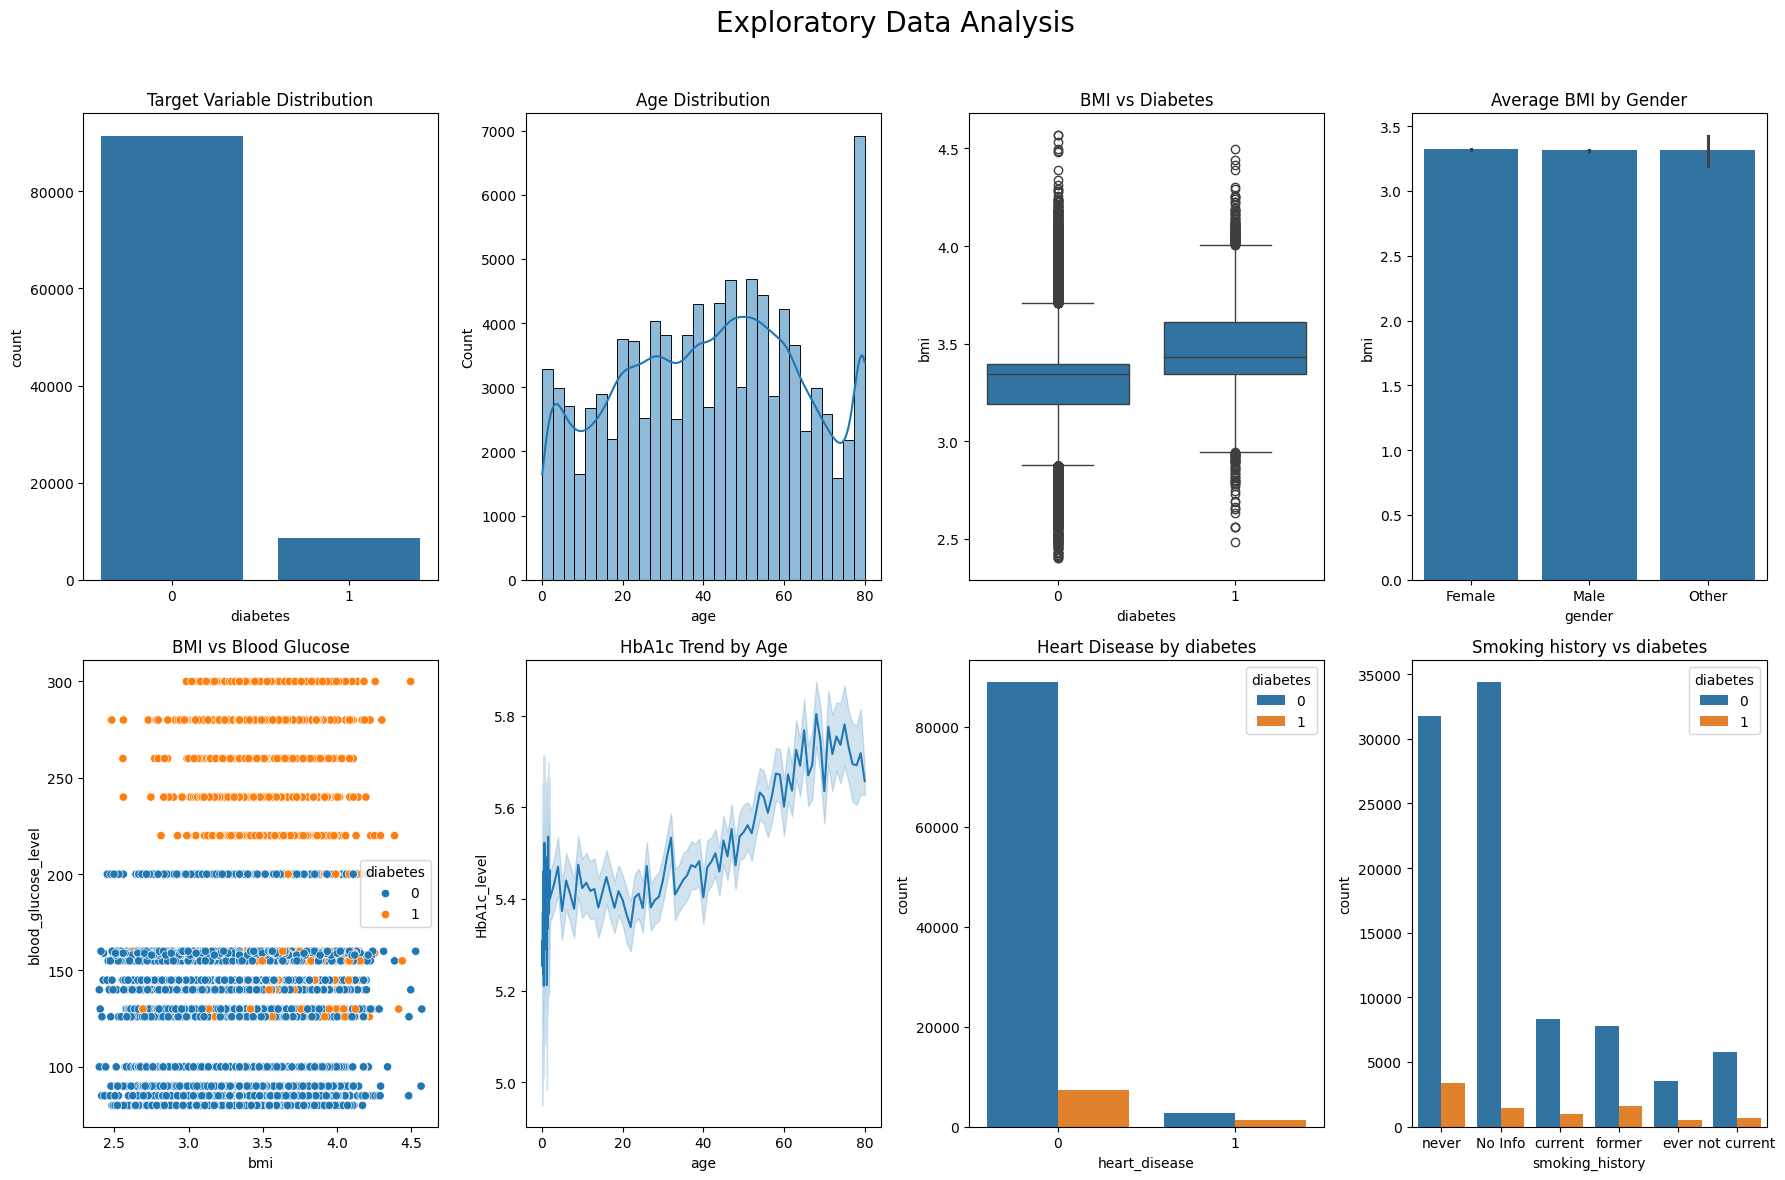

In [76]:
# Set figure size and layout (2 rows, 3 columns)
fig, axes = plt.subplots(2, 4, figsize=(18, 12))  # Adjust rows/cols as needed
fig.suptitle("Exploratory Data Analysis", fontsize=20)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Target variable distribution
sns.countplot(x='diabetes', data=df, ax=axes[0])
axes[0].set_title("Target Variable Distribution")

# Age distribution (histogram + KDE)
sns.histplot(df['age'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Age Distribution")

# BMI vs Diabetes (boxplot)
sns.boxplot(x='diabetes', y='bmi', data=df, ax=axes[2])
axes[2].set_title("BMI vs Diabetes")

# Average BMI by Gender (barplot)
sns.barplot(x='gender', y='bmi', data=df, ax=axes[3])
axes[3].set_title("Average BMI by Gender")

#  BMI vs Blood Glucose (scatter)
sns.scatterplot(x='bmi', y='blood_glucose_level', hue='diabetes', data=df, ax=axes[4])
axes[4].set_title("BMI vs Blood Glucose")

# HbA1c Trend by Age (lineplot)
sns.lineplot(x='age', y='HbA1c_level', data=df, ax=axes[5])
axes[5].set_title("HbA1c Trend by Age")

sns.countplot(x='heart_disease', hue='diabetes', data=df, ax=axes[6])
axes[6].set_title("Heart Disease by diabetes")

sns.countplot(x='smoking_history', hue='diabetes', data=df,ax=axes[7])
axes[7].set_title("Smoking history vs diabetes")

# Adjust layout so titles don't overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
plt.show()


In [77]:
from sklearn.feature_selection import SelectKBest, f_classif

X_new = SelectKBest(score_func=f_classif, k=8)
X_selected = X_new.fit_transform(X, y)

selected_features = X.columns[X_new.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Male', 'smoking_history_former'],
      dtype='object')


In [78]:
from sklearn.model_selection import train_test_split

# Train + Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train + Validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Testing set:", X_test.shape)


Training set: (64000, 13)
Validation set: (16000, 13)
Testing set: (20000, 13)


# Iris


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelBinarizer

In [80]:

df = pd.read_csv("Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:

df.shape


(150, 6)

In [82]:

df.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [83]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [84]:

df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [85]:

df.isnull().sum()


,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [86]:

df.duplicated().sum()


np.int64(0)

In [87]:

df['Species'].value_counts()


,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [88]:
X=df.drop(columns=['Species'])
y=df['Species']

In [89]:
nums_cols=X.select_dtypes(include=['int64','float64']).columns.tolist()
print("The number columns are: ",nums_cols)
binary_cols=[col for col in X.columns if X[col].nunique()==2]
print("The binary columns are: ",binary_cols)
cat_cols=X.select_dtypes(include='object').columns.tolist()
cat_cols=[col for col in cat_cols if col not in binary_cols]
print("The categorical columns are: ",cat_cols)

The number columns are:  ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
The binary columns are:  []
The categorical columns are:  []


In [90]:
scaler = StandardScaler()
X[nums_cols] = scaler.fit_transform(X[nums_cols])

In [91]:
print(X)

           Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   -1.720542      -0.900681      1.032057      -1.341272     -1.312977
1   -1.697448      -1.143017     -0.124958      -1.341272     -1.312977
2   -1.674353      -1.385353      0.337848      -1.398138     -1.312977
3   -1.651258      -1.506521      0.106445      -1.284407     -1.312977
4   -1.628164      -1.021849      1.263460      -1.341272     -1.312977
..        ...            ...           ...            ...           ...
145  1.628164       1.038005     -0.124958       0.819624      1.447956
146  1.651258       0.553333     -1.281972       0.705893      0.922064
147  1.674353       0.795669     -0.124958       0.819624      1.053537
148  1.697448       0.432165      0.800654       0.933356      1.447956
149  1.720542       0.068662     -0.124958       0.762759      0.790591

[150 rows x 5 columns]


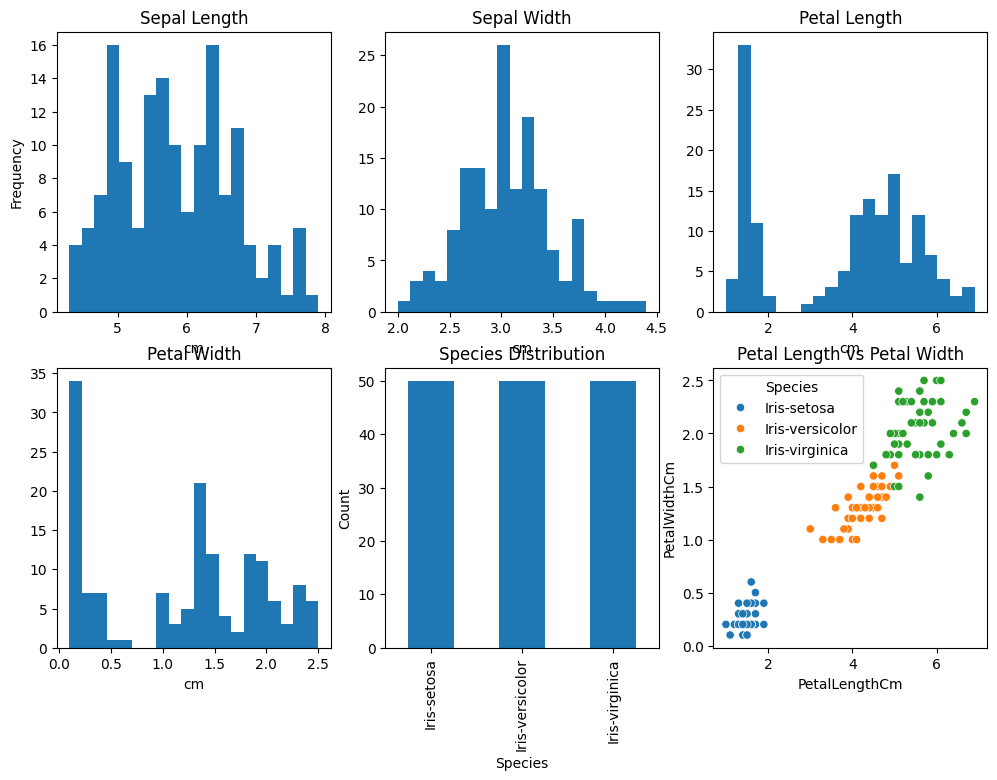

<Figure size 640x480 with 0 Axes>

In [92]:

plt.figure(figsize=(12, 8))

# Sepal Length
plt.subplot(2, 3, 1)
plt.hist(df['SepalLengthCm'], bins=20)
plt.title("Sepal Length")
plt.xlabel("cm")
plt.ylabel("Frequency")

# Sepal Width
plt.subplot(2, 3, 2)
plt.hist(df['SepalWidthCm'], bins=20)
plt.title("Sepal Width")
plt.xlabel("cm")

# Petal Length
plt.subplot(2, 3, 3)
plt.hist(df['PetalLengthCm'], bins=20)
plt.title("Petal Length")
plt.xlabel("cm")

# Petal Width
plt.subplot(2, 3, 4)
plt.hist(df['PetalWidthCm'], bins=20)
plt.title("Petal Width")
plt.xlabel("cm")

# Species Count
plt.subplot(2, 3, 5)
df['Species'].value_counts().plot(kind='bar')
plt.title("Species Distribution")
plt.xlabel("Species")
plt.ylabel("Count")

plt.subplot(2,3,6)
sns.scatterplot(x='PetalLengthCm',
                y='PetalWidthCm',
                hue='Species',
                data=df)
plt.title("Petal Length vs Petal Width")
plt.show()


plt.tight_layout()
plt.show()


In [93]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Id', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)


(120, 3) (30, 3)
